This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [15]:
# imports
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

# load data
names = ['sepal length','sepal width','petal length','petal width','class']
flower = pd.read_csv('iris_not_clean.data',
                     header = None,
                     skiprows=[1, 34],
                     sep = '|',
                     names = names
                    )

In [3]:
# explore data dimensions
flower.shape
print('The iris data set has',flower.shape[0],'rows and',flower.shape[1],'columns')

(153, 5)

The iris data set has 153 rows and 5 columns


In [4]:
# how many nulls in the file
row_nan_sums =flower.isnull().sum(axis = 1)
print('The total number of null values is',row_nan_sums.sum())

The total number of null values is 9


In [5]:
# nans per row
nan_df = flower[row_nan_sums>0]
print('Rows that contain nulls and how many of each:')
nan_df.isnull().sum(axis = 1)

Rows that contain nulls and how many of each:


28    1
29    5
44    3
dtype: int64

In [6]:
# nans per column
column_nan_sums =flower.isnull().sum()
print('NaNs per column:')
column_nan_sums

NaNs per column:


sepal length    2
sepal width     1
petal length    2
petal width     2
class           2
dtype: int64

In [7]:
# The current 36th sample
print('Original sample:')
flower.iloc[35]
# The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
flower.iloc[35] = [4.9,3.1,1.5,0.2,"Iris-setosa"]
print('Corrected sample:')
flower.iloc[35]

Original sample:


sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 35, dtype: object

Corrected sample:


sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.2
class           Iris-setosa
Name: 35, dtype: object

In [8]:
# The current 39th sample
print('Original sample:')
flower.loc[38]
# The 39th sample should be: 4.9,3.6,1.4,0.1,"Iris-setosa"
flower.loc[38] = [4.9,3.6,1.4,0.1,"Iris-setosa"]
print('Corrected sample:')
flower.loc[38]

Original sample:


sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 38, dtype: object

Corrected sample:


sepal length            4.9
sepal width             3.6
petal length            1.4
petal width             0.1
class           Iris-setosa
Name: 38, dtype: object

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

In [9]:
# mean
print('Mean for each column:')
flower.mean()
# variance
print('Variance for each column')
flower.var()
flower.describe()

Mean for each column:


sepal length    5.833775
sepal width     3.060526
petal length    3.746358
petal width     1.192715
dtype: float64

Variance for each column


sepal length    0.694918
sepal width     0.188365
petal length    3.116903
petal width     0.583747
dtype: float64

,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.833775,3.060526,3.746358,1.192715
std,0.833618,0.434011,1.765475,0.764033
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# drop nan rows
flower.dropna(inplace= True)

In [11]:
# reclculate mean
print('Mean for each column:')
flower.mean()
# recalculate variance
print('Variance for each column')
flower.var()

Mean for each column:


sepal length    5.838000
sepal width     3.057333
petal length    3.757333
petal width     1.199333
dtype: float64

Variance for each column


sepal length    0.696868
sepal width     0.189979
petal length    3.119510
petal width     0.581006
dtype: float64

In [12]:
# correlation between the fourth column and each of the other three columns
flower.corr()['petal width']

sepal length    0.819789
sepal width    -0.366126
petal length    0.962865
petal width     1.000000
Name: petal width, dtype: float64

column 1: sepal length  
column 2: sepal width  
column 3: petal length  
column 4: petal width 
Petal width and petal length are high correlated with each other with a correlation value of 0.96  
Petal width and sepal length are also correlated with each other with a correlation value of 0.82

In [13]:
# How many records exist for each class. # Hint, you can do this in one line by using groupby
#flower.groupby('class').count()
flower['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [16]:
#set random seed
np.random.seed(1234)
flower.sample(20)

,sepal length,sepal width,petal length,petal width,class
29,NaN,NaN,NaN,NaN,NaN
125,7.7,2.8,6.7,2.0,Iris-virginica
91,5.6,3.0,4.1,1.3,Iris-versicolor
57,6.5,2.8,4.6,1.5,Iris-versicolor
63,5.0,2.0,3.5,1.0,Iris-versicolor
109,4.9,2.5,4.5,1.7,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
117,5.8,2.8,5.1,2.4,Iris-virginica
48,5.1,3.8,1.6,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6F118DF60>,
      dtype=object)

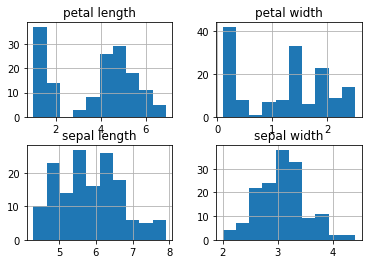

In [17]:
#histogram of features
flower.hist()

class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

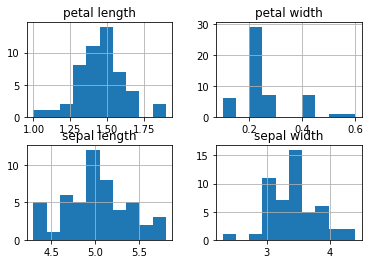

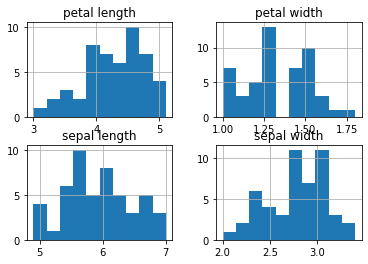

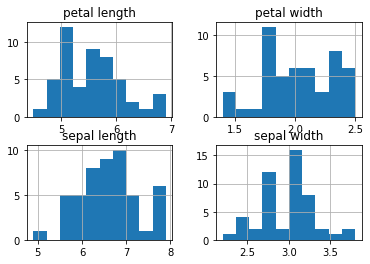

In [19]:
#histogram of features by attribute
flower.groupby(by = 'class').hist()

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Density')

Original sample mean: 3.7573333333333356
New 500 sample mean: 3.7983377542327648
Distance between original and new sample means: 0.01321305945493112


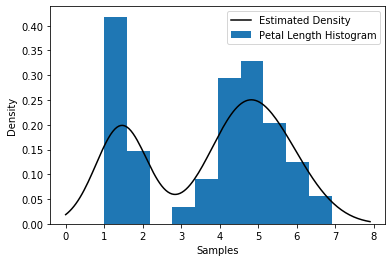

In [13]:
# Solve Here
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = flower['petal length']  # data
xs = np.linspace(x1.min()-1, x1.max()+1, len(flower['petal length'])) 
# find out the best fit
kde1 = scipy.stats.gaussian_kde(x1)  
# plot histogram and pdf
fig = plt.figure()
plt.hist(x1, density=True, label='Petal Length Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test your fit
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()
#mean of original samples
print('Original sample mean:',flower['petal length'].mean())
#mean of new samples
print('New 500 sample mean:',kde1.resample(500).mean())
#distance bewteen means
print('Distance between original and new sample means:',
      abs(flower['petal length'].mean()-kde1.resample(500).mean()))

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

array([0.92482346, 0.05280611, 0.01715424, 0.00521619])

<BarContainer object of 4 artists>

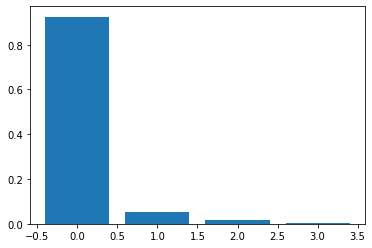

In [14]:
# Solve Here
from sklearn.decomposition import PCA
import numpy as np
# Create a regular PCA model 
pca_all = PCA()
#use the numeric data, no strings
flower_numeric = flower.drop('class',axis = 1)
#fit model
reduced_data_pca = pca_all.fit_transform(flower_numeric)
pca_all.explained_variance_ratio_
plt.bar(np.arange(4),pca_all.explained_variance_ratio_)

(150, 3)

<BarContainer object of 3 artists>

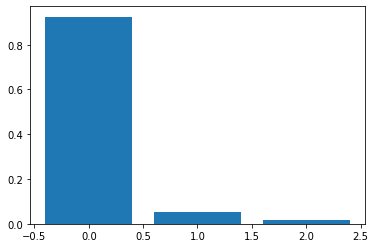

In [15]:
#set number of components to 3
pca = PCA(n_components=3)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(flower_numeric)

# Inspect the shape
reduced_data_pca.shape
plt.bar(np.arange(3),pca.explained_variance_ratio_)

In [16]:
reduced_data_pca.shape[1]

3

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[ 2.37749847  0.26084641  0.05301478]
 [-2.6470055   0.19038144  0.0141198 ]
 [ 0.67750537 -0.31340702 -0.04387986]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


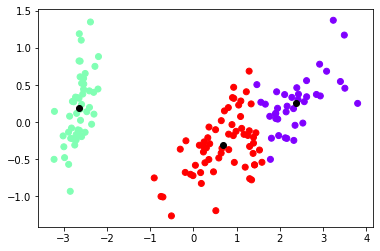

In [17]:
# Solve Here
# lets form our clusters
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=reduced_data_pca.shape[1])  
kmeans.fit(reduced_data_pca)  
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
#scatter plot
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,1], c=kmeans.labels_, cmap='rainbow') 
#display the cluster means
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c ='k')

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

The training accuracy is: 0.9166666666666666
The validation accuracy is: 0.8666666666666667


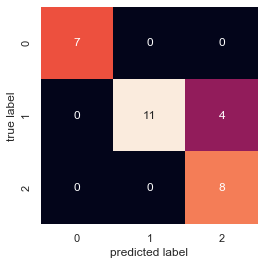

In [18]:
# Solve Here
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
#divide data set into 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(reduced_data_pca,flower['class'], test_size=0.20)
#Build logistic model
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
#model predictions
predict = logReg.predict(x_test)
# Use score method to get accuracy of model
train_score = logReg.score(x_train, y_train)
print('The training accuracy is:',train_score)
test_score = logReg.score(x_test, y_test)
print('The validation accuracy is:',test_score)
# np.sum(predict == y_test) / len(predict)  # almost identical predictions

# Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predict)
# Stylized Confusion Matrix
import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(3),
            yticklabels=range(3))
plt.ylabel('true label')
plt.xlabel('predicted label');